<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Observations-and-Insights" data-toc-modified-id="Observations-and-Insights-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Observations and Insights</a></span></li><li><span><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary Statistics</a></span></li><li><span><a href="#Bar-and-Pie-Charts" data-toc-modified-id="Bar-and-Pie-Charts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bar and Pie Charts</a></span></li><li><span><a href="#Quartiles,-Outliers-and-Boxplots" data-toc-modified-id="Quartiles,-Outliers-and-Boxplots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quartiles, Outliers and Boxplots</a></span></li><li><span><a href="#Line-and-Scatter-Plots" data-toc-modified-id="Line-and-Scatter-Plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Line and Scatter Plots</a></span></li><li><span><a href="#Correlation-and-Regression" data-toc-modified-id="Correlation-and-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlation and Regression</a></span></li></ul></div>

# Pymaceuticals' Animal Study Data Visualisation

## Observations and Insights 

* The numbers of mice used in each treatment regimen are quite similar.
* The distribution of female and male mice is quite balanced throughout the course of the study.
* Further investigation is required to understand about the outlier in the Infubinol regimen to decide whether to drop the outlier or not
* With correlation coefficient of 0.84, there is a strong positive correlation between mouse weights and average tumor volumes for the Capomulin treatment.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# mouse_metadata dataset has a Mouse ID column. Check if it is unique.
mouse_metadata["Mouse ID"].is_unique

True

In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of unique mice in df beforing cleaning
df["Mouse ID"].nunique()

249

In [7]:
# Check the data for any mouse ID with duplicate time points 
duplicate_rows = df[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# List Mouse IDs with duplicate time points 
to_remove_ID = duplicate_rows["Mouse ID"].unique().tolist()
to_remove_ID

['g989']

In [9]:
# Remove any data associated with that mouse ID
cleandf = df[~df['Mouse ID'].isin(to_remove_ID)]

In [10]:
# Checking the number of mice in the clean DataFrame
cleandf["Mouse ID"].nunique()

248

In [11]:
# Final overview of the dataframe: any missing values, any inappropriate data types
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


## Summary Statistics

**Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen**

In [12]:
regimen_group = cleandf.groupby("Drug Regimen")
tumor_volume = regimen_group["Tumor Volume (mm3)"]

In [13]:
# Method 1: creating multiple series and putting them all together at the end
def summary_statistics():
    tumor_volume_mean = tumor_volume.mean()
    tumor_volume_median = tumor_volume.median()
    tumor_volume_variance = tumor_volume.var()
    tumor_volume_std = tumor_volume.std()
    tumor_volume_sem = tumor_volume.sem()

    return pd.DataFrame({"Mean tumor volume": tumor_volume_mean,
                        "Median tumor volume": tumor_volume_median,
                        "Tumor volume variance": tumor_volume_variance,
                        "Tumor volume standard deviation": tumor_volume_std,
                        "Tumor volume SEM": tumor_volume_sem
                        })

In [14]:
tumor_volume_each_regimen_summary = summary_statistics()
tumor_volume_each_regimen_summary

,Mean tumor volume,Median tumor volume,Tumor volume variance,Tumor volume standard deviation,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Method 2: producing everything in a single groupby function


## Bar and Pie Charts

**Generate a bar plot showing the total number of mice for each treatment regimen throughout the course of the study using pandas**

In [16]:
mice_count_per_treatment = cleandf.groupby("Drug Regimen")["Mouse ID"].nunique().rename("Count")
mice_count_per_treatment

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Count, dtype: int64

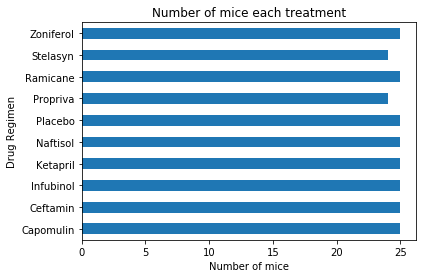

<Figure size 432x288 with 0 Axes>

In [17]:
bar_chart = mice_count_per_treatment.plot(kind="barh", title="Number of mice each treatment")
bar_chart.set_xlabel("Number of mice")
plt.show()
plt.tight_layout()

**Generate a bar plot showing the total number of mice for each treatment regimen throughout the course of the study using pyplot**

In [18]:
mice_count_per_treatment_df = pd.DataFrame(mice_count_per_treatment).reset_index()
mice_count_per_treatment_df

,Drug Regimen,Count
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


In [19]:
drug_regimen = mice_count_per_treatment_df.iloc[:,0]
drug_regimen

0    Capomulin
1     Ceftamin
2    Infubinol
3     Ketapril
4     Naftisol
5      Placebo
6     Propriva
7     Ramicane
8     Stelasyn
9    Zoniferol
Name: Drug Regimen, dtype: object

In [20]:
mice_count = mice_count_per_treatment_df.iloc[:,1]
mice_count

0    25
1    25
2    25
3    25
4    25
5    25
6    24
7    25
8    24
9    25
Name: Count, dtype: int64

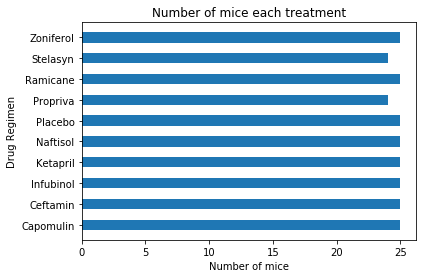

In [21]:
plt.barh(drug_regimen, mice_count, height=0.5)
plt.title("Number of mice each treatment")
plt.xlabel("Number of mice")
plt.ylabel("Drug Regimen")
plt.show()

**Generate a pie plot showing the distribution of female versus male mice using pandas**

In [22]:
sexgroup_count = cleandf.groupby("Sex")["Mouse ID"].nunique().rename("Count")
sexgroup_count

Sex
Female    123
Male      125
Name: Count, dtype: int64

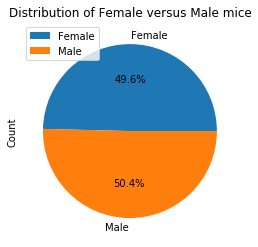

<Figure size 432x288 with 0 Axes>

In [23]:
pie_chart = sexgroup_count.plot(kind="pie", autopct="%1.1f%%", legend=True, title="Distribution of Female versus Male mice")
plt.legend(loc="upper left")
plt.show()
plt.tight_layout()

**Generate a pie plot showing the distribution of female versus male mice using pyplot**

In [24]:
sexcount_df = pd.DataFrame(sexgroup_count).reset_index()
sexcount_df

,Sex,Count
0,Female,123
1,Male,125


In [25]:
gender = sexcount_df.iloc[:,0]
gender

0    Female
1      Male
Name: Sex, dtype: object

In [26]:
gender_count = sexcount_df.iloc[:,1]
gender_count

0    123
1    125
Name: Count, dtype: int64

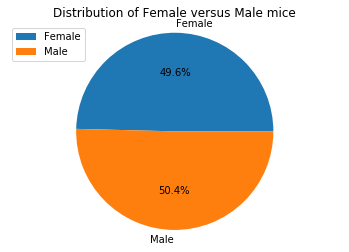

In [27]:
plt.pie(gender_count, labels=gender, autopct="%1.1f%%")
plt.title("Distribution of Female versus Male mice")
plt.legend(loc="upper left")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

* **Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin**
* **Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens**

In [28]:
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [29]:
selected_df = cleandf[cleandf["Drug Regimen"].isin(treatment_list)]

In [30]:
sorted_df = selected_df.sort_values(by=["Drug Regimen", "Mouse ID", "Timepoint"])

In [31]:
final_tumor_groupby = sorted_df.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].last().rename("Final Tumor Volume (mm3)")
final_tumor_df = pd.DataFrame(final_tumor_groupby).reset_index("Mouse ID")
final_tumor_df

,Mouse ID,Final Tumor Volume (mm3)
Drug Regimen,,
Capomulin,b128,38.982878
Capomulin,b742,38.939633
Capomulin,f966,30.485985
Capomulin,g288,37.074024
Capomulin,g316,40.159220
...,...,...
Ramicane,s508,30.276232
Ramicane,u196,40.667713
Ramicane,w678,43.166373


In [32]:
final_tumor_df.to_excel("output.xlsx")

In [33]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = list()
upperq_list = list()
median_list = list()
lowerq_list = list()
iqr_list = list()
upper_bound_list = list()
lower_bound_list = list()
potential_outlier_list = list()

for treatment in treatment_list:
    filtered_series = final_tumor_df.loc[treatment, "Final Tumor Volume (mm3)"]
    
    tumor_vol_list.append(filtered_series.tolist())
    
    quartiles = filtered_series.quantile([.25,.5,.75])
    
    upperq = round(quartiles[0.75], 3)
    upperq_list.append(upperq)
    
    median = round(quartiles[0.5], 3)
    median_list.append(median)
    
    lowerq = round(quartiles[0.25], 3)
    lowerq_list.append(lowerq)
    
    iqr = round((upperq-lowerq), 3)
    iqr_list.append(iqr)
    
    upper_bound = round((upperq + (1.5*iqr)), 3)
    upper_bound_list.append(upper_bound)
    
    lower_bound = round((lowerq - (1.5*iqr)), 3)
    lower_bound_list.append(lower_bound)
    
    outlier_series = filtered_series[(filtered_series < lower_bound) | (filtered_series > upper_bound)]
    potential_outlier_list.append(outlier_series.tolist())

In [34]:
quantile_df = pd.DataFrame({
    "Treament Regimen": treatment_list,
    "Upper Quartile": upperq_list,
    "Median": median_list,
    "Lower Quartile": lowerq_list,
    "Interquartile Range": iqr_list,
    "Outlier Upper Bound": upper_bound_list,
    "Outlier Lower Bound": lower_bound_list,
    "Number of potential outliers": [len(x) for x in potential_outlier_list]
})
quantile_df

,Treament Regimen,Upper Quartile,Median,Lower Quartile,Interquartile Range,Outlier Upper Bound,Outlier Lower Bound,Number of potential outliers
0,Capomulin,40.159,38.125,32.377,7.782,51.832,20.704,0
1,Ramicane,40.659,36.562,31.560,9.099,54.308,17.911,0
2,Infubinol,65.526,60.165,54.049,11.477,82.742,36.834,1
3,Ceftamin,64.300,59.852,48.722,15.578,87.667,25.355,0


In [35]:
potential_outlier_list

[[], [], [36.321345799999996], []]

As can be seen in the above table, there could be one potential outlier in the final tumor volumes of mice treated by Infubinol drug regimen

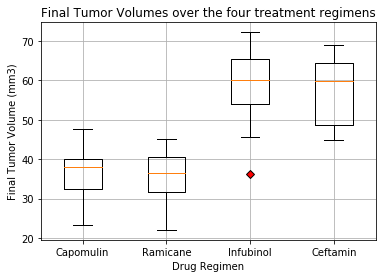

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D')

fig, ax = plt.subplots()
ax.set_title("Final Tumor Volumes over the four treatment regimens")
ax.boxplot(tumor_vol_list, labels=treatment_list, flierprops=red_diamond)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.grid()
plt.show()

## Line and Scatter Plots

**Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin**

In [37]:
capomulin_df = cleandf[cleandf["Drug Regimen"] == "Capomulin"].set_index("Mouse ID")
capomulin_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
j246,0,45.000000,0,Capomulin,Female,21,21
r554,0,45.000000,0,Capomulin,Female,8,17
s185,0,45.000000,0,Capomulin,Female,3,17
b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...
s710,45,40.728578,1,Capomulin,Female,1,23
j119,45,38.125164,1,Capomulin,Female,7,23
i557,45,47.685963,1,Capomulin,Female,1,24


In [38]:
mouse_to_search = input("Which Mouse ID would you like to look at? ")

Which Mouse ID would you like to look at? s710


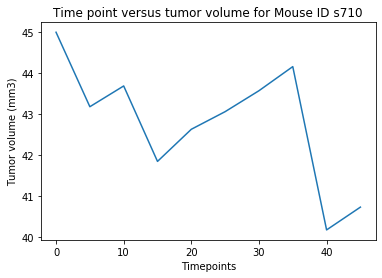

In [39]:
time_point_the_mouse = capomulin_df.loc[mouse_to_search, "Timepoint"]
tumor_volume_the_mouse = capomulin_df.loc[mouse_to_search, "Tumor Volume (mm3)"]

plt.plot(time_point_the_mouse, tumor_volume_the_mouse)

plt.title(f"Time point versus tumor volume for Mouse ID {mouse_to_search}")
plt.xlabel("Timepoints")
plt.ylabel("Tumor volume (mm3)")
plt.show()

**Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen**

In [40]:
weight_tumor_group = capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().rename("Average tumor volume (mm3)")
weight_tumor_df = pd.DataFrame(weight_tumor_group).reset_index()
weight_tumor_df

,Mouse ID,Weight (g),Average tumor volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [41]:
mouse_weights = weight_tumor_df["Weight (g)"]
average_tumor_volume = weight_tumor_df["Average tumor volume (mm3)"]

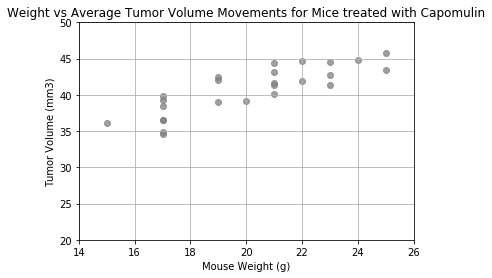

In [42]:
plt.scatter(mouse_weights, average_tumor_volume, facecolors="grey", alpha=0.75)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume Movements for Mice treated with Capomulin")
plt.xlim(14,26)
plt.ylim(20,50)
plt.grid()
plt.show()

## Correlation and Regression

In [43]:
# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen
corr_coefficient = round(st.pearsonr(mouse_weights,average_tumor_volume)[0], 2)
print(f"The correlation coefficient between mouse weight and average tumor volume is {corr_coefficient}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


There is a strong positive correlation between mouse weights and average tumor volumes.

In [44]:
# Perform a linear regression on mouse weight versus average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, average_tumor_volume)

In [45]:
# Create equation of line to calculate predicted Average Tumor Volume for the Capomulin regimen
tumor_volume_regress_values = slope * mouse_weights + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


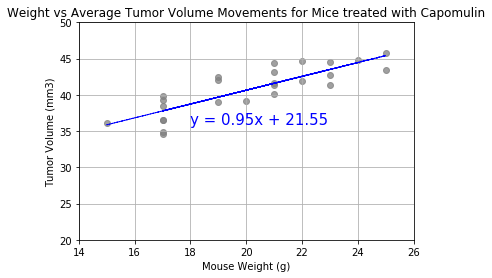

In [46]:
# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weights, average_tumor_volume, facecolors="grey", alpha=0.75)

plt.plot(mouse_weights, tumor_volume_regress_values, "b--", linewidth=1)
plt.annotate(line_eq, (18, 36),fontsize=15,color="blue")

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume Movements for Mice treated with Capomulin")
plt.xlim(14,26)
plt.ylim(20,50)
plt.grid()
plt.show()